# Data Loading

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


## Mengunduh Dataset dari Kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (4).json to kaggle (4).json


In [3]:
import os
import shutil

# Rename file yang diupload ke kaggle.json
original_filename = next(iter(uploaded))  # Ambil nama file hasil upload
os.rename(original_filename, "kaggle.json")

# Buat folder ~/.kaggle dan pindahkan file
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Ubah permission agar tidak error
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download file ZIP dari dataset
!kaggle datasets download -d bharathreddybollu/hospital-wait-time-data

# Ekstrak file ZIP
import zipfile

with zipfile.ZipFile("hospital-wait-time-data.zip", "r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/bharathreddybollu/hospital-wait-time-data
License(s): MIT
  0% 0.00/587k [00:00<?, ?B/s]
100% 587k/587k [00:00<00:00, 977MB/s]


## Memuat Data ke Pandas DataFrame

In [4]:
# Perhatikan penulisan nama file: dua spasi & huruf besar I di "TIme"
df = pd.read_csv("Hospital Wait  TIme Data.csv")

# Tampilkan beberapa baris awal
df.head()


,PatientID,AgeGroup,Department,AppointmentType,InsuranceType,ArrivalMethod,VisitDate,AppointmentTime,ActualArrivalTime,CheckInTime,...,TestsToDischargeTime,TotalTimeInHospital,TotalDelayTime,ArrivalHour,ArrivalDayOfWeek,ArrivalMonth,OccupancyRateBin,ProvidersOnShiftBin,NursesOnShiftBin,StaffPatientRatioBin
0,P100000,Adult (36-60),Orthopedics,New Patient,Private,Walk-in,15-03-2024,15-03-2024 14:00,15-03-2024 13:32,15-03-2024 13:36,...,71.066667,151.750000,123.766667,13,4,3,Low,"(5.0, 7.0]","(12.0, 15.0]","(0.2, 0.3]"
1,P100001,Adult (36-60),Cardiology,Specialist Referral,Self-pay,Scheduled,01-01-2024,01-01-2024 09:45,01-01-2024 09:36,01-01-2024 09:41,...,4.500000,141.050000,128.583333,9,0,1,Medium,"(5.0, 7.0]","(12.0, 15.0]","(0.099, 0.2]"
2,P100002,Young Adult (18-35),General Surgery,Specialist Referral,Medicaid,Scheduled,19-01-2024,19-01-2024 16:15,19-01-2024 16:07,19-01-2024 16:10,...,119.933333,387.050000,376.700000,16,4,1,Very High,"(3.0, 5.0]","(6.0, 9.0]","(0.099, 0.2]"
3,P100003,Adult (36-60),Emergency,Urgent Care,NaN,Emergency,27-03-2024,27-03-2024 11:00,27-03-2024 10:59,27-03-2024 11:02,...,13.183333,37.183333,37.116667,10,2,3,Low,"(3.0, 5.0]","(2.999, 6.0]","(0.3, 0.4]"
4,P100004,Senior (61+),Cardiology,Urgent Care,Medicare,Scheduled,10-03-2024,10-03-2024 16:45,10-03-2024 16:48,10-03-2024 16:52,...,14.466667,223.083333,222.850000,16,6,3,High,"(7.0, 8.0]","(9.0, 12.0]","(0.2, 0.3]"


# EDA (Eksplorasi Data)

In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientID                       5000 non-null   object 
 1   AgeGroup                        5000 non-null   object 
 2   Department                      5000 non-null   object 
 3   AppointmentType                 5000 non-null   object 
 4   InsuranceType                   4022 non-null   object 
 5   ArrivalMethod                   5000 non-null   object 
 6   VisitDate                       5000 non-null   object 
 7   AppointmentTime                 5000 non-null   object 
 8   ActualArrivalTime               5000 non-null   object 
 9   CheckInTime                     5000 non-null   object 
 10  TriageCompleteTime              5000 non-null   object 
 11  ProviderStartTime               5000 non-null   object 
 12  ProviderEndTime                 50

## Statistik Deskriptif

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
       FacilityOccupancyRate  ProvidersOnShift  NursesOnShift  \
count            5000.000000       5000.000000     5000.00000   
mean                0.626616          4.986600        9.03420   
std                 0.187395          1.994296        3.73098   
min                 0.300000          2.000000        3.00000   
25%                 0.460000          3.000000        6.00000   
50%                 0.630000          5.000000        9.00000   
75%                 0.790000          7.000000       12.00000   
max                 0.950000          8.000000       15.00000   

       StaffToPatientRatio  IsRegistered  IsOnlineBooking    Year         Day  \
count          5000.000000   5000.000000      5000.000000  5000.0  5000.00000   
mean              0.302068      0.297800         0.702200  2024.0    15.67720   
std               0.115172      0.457337         0.457337     0.0     8.80171   
min               0.100000      0.000000         0.000000  2024.0   

In [7]:
# Menampilkan statistik deskriptif untuk kolom non-numerik (terutama objek/kategorikal)
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
print(df.describe(include=['object']))


Statistik Deskriptif untuk Kolom Kategorikal:
       PatientID       AgeGroup Department AppointmentType InsuranceType  \
count       5000           5000       5000            5000          4022   
unique      5000              4         10               4             4   
top      P104999  Adult (36-60)   Oncology     New Patient      Self-pay   
freq           1           1294        530            1305          1056   

       ArrivalMethod   VisitDate   AppointmentTime ActualArrivalTime  \
count           5000        5000              5000              5000   
unique             3          91              2610              4733   
top        Scheduled  26-03-2024  20-01-2024 13:00  03-02-2024 16:13   
freq            3511          77                 7                 4   

             CheckInTime  ... AssignedDepartment FirstSeenByNurseTime  \
count               5000  ...               5000                 5000   
unique              4746  ...                 10                 

 ## Visualisasi Matriks Korelasi

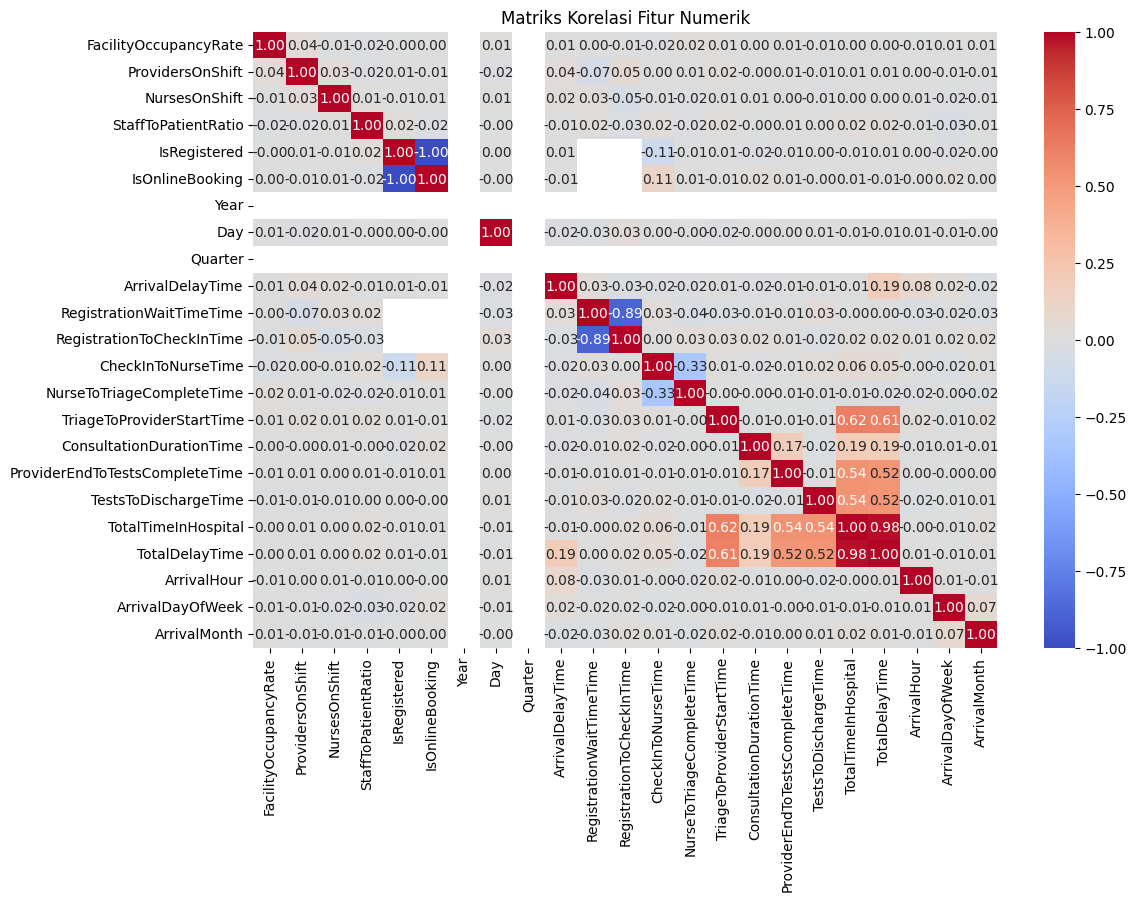

In [8]:
# Pastikan kolom 'Duration' ada dan numerik
numeric_df = df.select_dtypes(include=np.number) # Pilih hanya kolom numerik

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

 # Data Preprocessing

 ## Menangani Missing Values

In [9]:
# Menampilkan jumlah missing values per kolom
df.isnull().sum()

# Mengisi missing values pada kolom 'InsuranceType' dan 'TestsOrdered' dengan 'Unknown'
df['InsuranceType'] = df['InsuranceType'].fillna('Unknown')
df['TestsOrdered'] = df['TestsOrdered'].fillna('Unknown')


In [10]:
# Penanganan missing pada RegistrationTime
print(f"\nMissing RegistrationTime: {df['RegistrationTime'].isna().sum()} dari {len(df)} baris")
df['RegistrationTime_missing'] = df['RegistrationTime'].isna().astype(int) # Flag missing
df['RegistrationTime'] = pd.to_datetime(df['RegistrationTime'], errors='coerce') # Konversi ke datetime
min_date = df['RegistrationTime'].min() # Cari tanggal minimum yang valid
if pd.isna(min_date):
    min_date = pd.to_datetime('2000-01-01') # Fallback jika semua NaT
df['RegistrationTime'] = df['RegistrationTime'].fillna(min_date) # Isi missing dengan tanggal minimum
print(f"Missing RegistrationTime setelah imputasi: {df['RegistrationTime'].isna().sum()}")


Missing RegistrationTime: 3511 dari 5000 baris
Missing RegistrationTime setelah imputasi: 0


<ipython-input-10-568130070>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['RegistrationTime'] = pd.to_datetime(df['RegistrationTime'], errors='coerce') # Konversi ke datetime


In [11]:
# Imputasi missing pada kolom durasi/waktu lainnya dengan median
cols_to_impute_median = ['RegistrationWaitTimeTime', 'RegistrationToCheckInTime'] # Tambahkan kolom lain jika perlu
for col in cols_to_impute_median:
    if col in df.columns and df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Missing '{col}' diisi dengan median ({median_val:.2f}).")
        else:
            print(f"WARNING: Kolom '{col}' bukan numerik, tidak bisa diisi median.")

Missing 'RegistrationWaitTimeTime' diisi dengan median (5.98).
Missing 'RegistrationToCheckInTime' diisi dengan median (-2.99).


## Konversi Kolom Waktu ke Datetime dan Rekayasa Fitur

In [12]:
# 2. Konversi Kolom Waktu ke Datetime dan Ekstraksi Fitur Waktu
print("\nMengkonversi Kolom Waktu ke Datetime & Ekstraksi Fitur...")
time_cols_all = ['VisitDate', 'AppointmentTime', 'ProviderStartTime', 'ProviderEndTime',
                 'ActualArrivalTime', 'CheckInTime', 'TriageCompleteTime', 'TestsCompleteTime',
                 'DischargeTime', 'ArrivalDateTime', 'FirstSeenByNurseTime', 'DoctorOrProcedureStartTime',
                 'RegistrationTime'] # Tambahkan RegistrationTime yang sudah diimputasi

for col in time_cols_all:
    if col in df.columns and not pd.api.types.is_datetime64_any_dtype(df[col]):
        # Gunakan errors='coerce' untuk mengubah format tidak valid menjadi NaT
        df[col] = pd.to_datetime(df[col], errors='coerce')
        if pd.api.types.is_datetime64_any_dtype(df[col]):
             print(f"Kolom '{col}' dikonversi ke datetime.")
        else:
             print(f"WARNING: Kolom '{col}' gagal dikonversi ke datetime.")


Mengkonversi Kolom Waktu ke Datetime & Ekstraksi Fitur...
Kolom 'VisitDate' dikonversi ke datetime.
Kolom 'AppointmentTime' dikonversi ke datetime.
Kolom 'ProviderStartTime' dikonversi ke datetime.
Kolom 'ProviderEndTime' dikonversi ke datetime.


<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors=

Kolom 'ActualArrivalTime' dikonversi ke datetime.
Kolom 'CheckInTime' dikonversi ke datetime.
Kolom 'TriageCompleteTime' dikonversi ke datetime.


<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-12-1923075119>:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], e

Kolom 'TestsCompleteTime' dikonversi ke datetime.
Kolom 'DischargeTime' dikonversi ke datetime.


<ipython-input-12-1923075119>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Kolom 'ArrivalDateTime' dikonversi ke datetime.


<ipython-input-12-1923075119>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Kolom 'FirstSeenByNurseTime' dikonversi ke datetime.
Kolom 'DoctorOrProcedureStartTime' dikonversi ke datetime.


<ipython-input-12-1923075119>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


## Menghitung Kolom Target ('Duration')

In [13]:
# Hitung durasi yang relevan (dalam menit)
# Target: Duration Provider
if 'ProviderEndTime' in df.columns and 'ProviderStartTime' in df.columns and \
   pd.api.types.is_datetime64_any_dtype(df['ProviderEndTime']) and \
   pd.api.types.is_datetime64_any_dtype(df['ProviderStartTime']):
    df['Duration'] = (df['ProviderEndTime'] - df['ProviderStartTime']).dt.total_seconds() / 60.0
    print("Kolom 'Duration' (Target) dihitung.")
else:
    print("WARNING: Tidak dapat menghitung 'Duration'. Pastikan ProviderStartTime & ProviderEndTime ada dan datetime.")
    # Buat kolom 'Duration' dengan NaN jika tidak dapat dihitung, agar script selanjutnya tidak error
    df['Duration'] = np.nan


Kolom 'Duration' (Target) dihitung.


## Menghitung Durasi Antar Tahap Lainnya

In [14]:
# Hitung durasi antar tahap jika timestamp relevan ada
if 'ArrivalDateTime' in df.columns and 'FirstSeenByNurseTime' in df.columns and \
   pd.api.types.is_datetime64_any_dtype(df['ArrivalDateTime']) and \
   pd.api.types.is_datetime64_any_dtype(df['FirstSeenByNurseTime']):
    df['TimeFromArrivalToNurse'] = (df['FirstSeenByNurseTime'] - df['ArrivalDateTime']).dt.total_seconds() / 60.0
    df['TimeFromArrivalToNurse'] = df['TimeFromArrivalToNurse'].fillna(df['TimeFromArrivalToNurse'].median()) # Imputasi NaN
    df['TimeFromArrivalToNurse'] = df['TimeFromArrivalToNurse'].clip(lower=0) # Durasi tidak boleh negatif
    print("Fitur 'TimeFromArrivalToNurse' dihitung & diimputasi.")
else:
     df['TimeFromArrivalToNurse'] = np.nan # Buat kolom placeholder
     print("WARNING: Tidak dapat menghitung 'TimeFromArrivalToNurse'.")


if 'FirstSeenByNurseTime' in df.columns and 'DoctorOrProcedureStartTime' in df.columns and \
   pd.api.types.is_datetime64_any_dtype(df['FirstSeenByNurseTime']) and \
   pd.api.types.is_datetime64_any_dtype(df['DoctorOrProcedureStartTime']):
    df['TimeFromNurseToDoctor'] = (df['DoctorOrProcedureStartTime'] - df['FirstSeenByNurseTime']).dt.total_seconds() / 60.0
    df['TimeFromNurseToDoctor'] = df['TimeFromNurseToDoctor'].fillna(df['TimeFromNurseToDoctor'].median()) # Imputasi NaN
    df['TimeFromNurseToDoctor'] = df['TimeFromNurseToDoctor'].clip(lower=0) # Durasi tidak boleh negatif
    print("Fitur 'TimeFromNurseToDoctor' dihitung & diimputasi.")
else:
     df['TimeFromNurseToDoctor'] = np.nan # Buat kolom placeholder
     print("WARNING: Tidak dapat menghitung 'TimeFromNurseToDoctor'.")

Fitur 'TimeFromArrivalToNurse' dihitung & diimputasi.
Fitur 'TimeFromNurseToDoctor' dihitung & diimputasi.


 ## Mengekstrak Fitur Dari Tanggal/Waktu Utama

In [15]:
# Ekstrak fitur dari AppointmentTime atau VisitDate
if 'AppointmentTime' in df.columns and pd.api.types.is_datetime64_any_dtype(df['AppointmentTime']):
    df['AppointmentHour'] = df['AppointmentTime'].dt.hour
    print("Fitur 'AppointmentHour' diekstrak.")
else:
    df['AppointmentHour'] = np.nan
    print("WARNING: Tidak dapat mengekstrak 'AppointmentHour'.")

if 'VisitDate' in df.columns and pd.api.types.is_datetime64_any_dtype(df['VisitDate']):
    df['VisitDayOfWeek'] = df['VisitDate'].dt.dayofweek # 0=Senin, ..., 6=Minggu
    df['VisitMonth'] = df['VisitDate'].dt.month
    df['VisitYear'] = df['VisitDate'].dt.year
    df['VisitDayOfMonth'] = df['VisitDate'].dt.day
    df['IsWeekend'] = (df['VisitDayOfWeek'] >= 5).astype(int)
    print("Fitur 'VisitDayOfWeek', 'VisitMonth', 'VisitYear', 'VisitDayOfMonth', 'IsWeekend' diekstrak.")
else:
    df['VisitDayOfWeek'] = np.nan
    df['VisitMonth'] = np.nan
    df['VisitYear'] = np.nan
    df['VisitDayOfMonth'] = np.nan
    df['IsWeekend'] = np.nan
    print("WARNING: Tidak dapat mengekstrak fitur dari 'VisitDate'.")

Fitur 'AppointmentHour' diekstrak.
Fitur 'VisitDayOfWeek', 'VisitMonth', 'VisitYear', 'VisitDayOfMonth', 'IsWeekend' diekstrak.


 ## Penanganan Kolom Kategorikal

In [16]:
# 3. Penanganan Kolom Kategorikal yang Masih Object dan Kolom Binned
print("\nMenangani Kolom Kategorikal & Binned yang Tersisa...")
non_numeric_cols_after_time_features = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom non-numerik setelah ekstraksi fitur waktu:", non_numeric_cols_after_time_features)

cols_to_onehot = []
cols_to_drop_unhandled_object = []

for col in non_numeric_cols_after_time_features:
    print(f"Analisis kolom '{col}': {df[col].nunique()} nilai unik.")
    # Cek jumlah nilai unik untuk memutuskan One-Hot Encode atau Hapus
    if df[col].nunique() < 100: # Batas arbitrari, sesuaikan
        cols_to_onehot.append(col)
        # Isi NaN di kolom kategorikal dengan 'Unknown' sebelum One-Hot Encoding
        if df[col].isnull().any():
            df[col] = df[col].fillna('Unknown')
            print(f"Mengisi NaN di '{col}' dengan 'Unknown' sebelum One-Hot Encoding.")
    else:
        print(f"WARNING: Kolom '{col}' memiliki banyak nilai unik ({df[col].nunique()}), akan dihapus.")
        cols_to_drop_unhandled_object.append(col) # Hapus jika terlalu banyak unik (misal ProviderID, RoomNumber jika banyak)


Menangani Kolom Kategorikal & Binned yang Tersisa...
Kolom non-numerik setelah ekstraksi fitur waktu: ['PatientID', 'AgeGroup', 'Department', 'AppointmentType', 'InsuranceType', 'ArrivalMethod', 'TriageCategory', 'ReasonForVisit', 'TestsOrdered', 'ProviderID', 'RoomNumber', 'AssignedDepartment', 'BookingType', 'Month', 'DayOfWeek', 'OccupancyRateBin', 'ProvidersOnShiftBin', 'NursesOnShiftBin', 'StaffPatientRatioBin']
Analisis kolom 'PatientID': 5000 nilai unik.
Analisis kolom 'AgeGroup': 4 nilai unik.
Analisis kolom 'Department': 10 nilai unik.
Analisis kolom 'AppointmentType': 4 nilai unik.
Analisis kolom 'InsuranceType': 5 nilai unik.
Analisis kolom 'ArrivalMethod': 3 nilai unik.
Analisis kolom 'TriageCategory': 5 nilai unik.
Analisis kolom 'ReasonForVisit': 10 nilai unik.
Analisis kolom 'TestsOrdered': 11 nilai unik.
Analisis kolom 'ProviderID': 50 nilai unik.
Analisis kolom 'RoomNumber': 60 nilai unik.
Analisis kolom 'AssignedDepartment': 10 nilai unik.
Analisis kolom 'BookingType

In [17]:
# Lakukan One-Hot Encoding untuk kolom yang dipilih
if cols_to_onehot:
    print(f"\nMelakukan One-Hot Encoding pada kolom: {cols_to_onehot}")
    # dummy_na=False karena NaN sudah diisi 'Unknown'
    df = pd.get_dummies(df, columns=cols_to_onehot, drop_first=True, dummy_na=False)
    print("Shape setelah One-Hot Encoding lanjutan:", df.shape)
else:
    print("\nTidak ada kolom tambahan yang di-One-Hot Encode di langkah ini.")


Melakukan One-Hot Encoding pada kolom: ['AgeGroup', 'Department', 'AppointmentType', 'InsuranceType', 'ArrivalMethod', 'TriageCategory', 'ReasonForVisit', 'TestsOrdered', 'ProviderID', 'RoomNumber', 'AssignedDepartment', 'BookingType', 'Month', 'DayOfWeek', 'OccupancyRateBin', 'ProvidersOnShiftBin', 'NursesOnShiftBin', 'StaffPatientRatioBin']
Shape setelah One-Hot Encoding lanjutan: (5000, 230)


## Pemilihan Fitur (X) dan Target (y)

In [18]:
cols_to_drop_final = ['PatientID', # ID
                      'Duration', # Kolom Target (akan diambil terpisah)
                      # Kolom waktu/tanggal asli (setelah ekstraksi fitur)
                      'VisitDate', 'AppointmentTime', 'ProviderStartTime', 'ProviderEndTime',
                      'ActualArrivalTime', 'CheckInTime', 'TriageCompleteTime',
                      'TestsCompleteTime', 'DischargeTime', 'ArrivalDateTime',
                      'FirstSeenByNurseTime', 'DoctorOrProcedureStartTime', 'RegistrationTime',
                      # Kolom kategorikal asli (setelah di-one-hot encode)
                      'InsuranceType', 'ArrivalMethod', 'TriageCategory', 'ReasonForVisit', 'TestsOrdered',
                      # Kolom non-numerik yang dihapus karena banyak unik
                      ]

In [19]:
# Tambahkan kolom yang diputuskan untuk dihapus dari langkah penanganan non-numerik
cols_to_drop_final.extend(cols_to_drop_unhandled_object)

# Pastikan tidak ada duplikasi dan hapus kolom yang tidak ada
cols_to_drop_final = [col for col in list(set(cols_to_drop_final)) if col in df.columns]

print(f"Kolom yang akan dihapus sebelum membuat X: {cols_to_drop_final}")

Kolom yang akan dihapus sebelum membuat X: ['FirstSeenByNurseTime', 'CheckInTime', 'RegistrationTime', 'ProviderEndTime', 'Duration', 'ArrivalDateTime', 'ProviderStartTime', 'DischargeTime', 'TriageCompleteTime', 'VisitDate', 'ActualArrivalTime', 'AppointmentTime', 'PatientID', 'TestsCompleteTime', 'DoctorOrProcedureStartTime']


In [20]:
# Pisahkan fitur (X) dan target (y)
y = df['Duration'] # Ambil kolom target terlebih dahulu
X = df.drop(columns=cols_to_drop_final, errors='ignore') # Hapus kolom-kolom yang tidak diinginkan dari DataFrame

## Final Check Tipe Data dan Imputasi di X

In [21]:
# Pastikan X hanya berisi tipe data numerik/boolean yang sesuai untuk model
# get_dummies menghasilkan uint8, yang merupakan subtype int.
X = X.select_dtypes(include=np.number) # Termasuk int, float, uint8, dll. Jika ada boolean, tambahkan 'bool'

In [22]:
# Cek apakah masih ada kolom non-numerik yang terlewat
non_numeric_cols_final_check = X.select_dtypes(exclude=np.number).columns # Cek yang *bukan* numerik
if len(non_numeric_cols_final_check) > 0:
    print(f"\nWARNING: Masih ada kolom non-numerik di X final: {non_numeric_cols_final_check.tolist()}")
else:
    print("Semua kolom di X final adalah numerik.")

Semua kolom di X final adalah numerik.


In [23]:
# Cek NaN lagi di X sebelum scaling
if X.isnull().sum().sum() > 0:
    print("\nMengisi NaN yang tersisa di X dengan median sebelum scaling...")
    # Hitung median dari X sebelum di split (menggunakan seluruh data untuk robustness)
    X_medians_for_imputation_unscaled = X.median()
    X = X.fillna(X_medians_for_imputation_unscaled)
    print("Jumlah NaN di X setelah imputasi final:", X.isnull().sum().sum())

    # Simpan median dari X (unscaled) untuk imputasi di API
    # Menggunakan median dari X keseluruhan sebelum split
    import json
    print("\n--- Salin dictionary median unscaled berikut untuk median_values_for_imputation di kode Flask Anda: ---")
    # Hanya simpan median untuk kolom yang *memang* numerik di X final
    print(json.dumps(X_medians_for_imputation_unscaled[X_medians_for_imputation_unscaled.notna()].to_dict(), indent=4))

else:
     print("\nTidak ada NaN di X sebelum scaling.")
     X_medians_for_imputation_unscaled = {} # Dictionary kosong jika tidak ada NaN
     import json
     print("\n--- Tidak ada NaN di X, median_values_for_imputation di kode Flask Anda bisa menjadi dictionary kosong atau hanya untuk kolom yang mungkin missing di input API. ---")
     print("Untuk aman, pertimbangkan menyimpan median dari X_train setelah split jika Anda mengisi NaN setelah split.")
     # Atau, simpan median dari X_train setelah split jika Anda memindahkan imputasi ke setelah split
     # X_train_medians_unscaled = X_train.median().to_dict() # Ini jika imputasi NaN di X_train

# Cek NaN di target (y) - baris dengan NaN di target harus dihapus jika tidak bisa diimputasi
if y.isnull().any():
    print(f"\nWARNING: Missing values ditemukan di kolom target 'Duration'. Jumlah: {y.isnull().sum()}")
    # Hapus baris dengan NaN di target
    initial_rows = X.shape[0]
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]
    print(f"Menghapus {initial_rows - X.shape[0]} baris dengan NaN di target.")
    print(f"Shape X dan y setelah menghapus baris dengan NaN di target: {X.shape}, {y.shape}")


Tidak ada NaN di X sebelum scaling.

--- Tidak ada NaN di X, median_values_for_imputation di kode Flask Anda bisa menjadi dictionary kosong atau hanya untuk kolom yang mungkin missing di input API. ---
Untuk aman, pertimbangkan menyimpan median dari X_train setelah split jika Anda mengisi NaN setelah split.


 ## Analisis Kategori Fitur (Known vs Not Known at Start)

In [24]:
print(f"Shape X setelah final check dan imputasi: {X.shape}")
print(f"Jumlah NaN di X setelah imputasi final: {X.isnull().sum().sum()}")
print(f"Shape y setelah menghapus NaN target: {y.shape}")
print(f"Jumlah NaN di y setelah menghapus NaN target: {y.isnull().sum().sum()}")


# --- Implementasi Pemisahan Fitur Berdasarkan Nama ---
# Ambil semua kolom fitur dari DataFrame X yang sudah final
all_feature_cols = X.columns.tolist()

# Kolom-kolom yang mengindikasikan hasil dari proses atau sulit didapat di awal
# Gunakan keyword yang relevan.
# Kolom durasi yang Anda sebutkan masuk ke sini.
# RegistrationTime_missing juga cenderung bukan input awal, meskipun bukan durasi.
post_process_keywords = ['Time', 'Delay', 'Duration', '_missing'] # Tambahkan _missing

# Filter berdasarkan keyword tersebut
# Juga sertakan kolom yang secara spesifik Anda tahu sulit diinput di awal
not_known_at_start_candidates = [col for col in all_feature_cols if any(keyword.lower() in col.lower() for keyword in post_process_keywords)]

# Tambahkan kolom lain yang Anda tahu sulit diinput tapi mungkin tidak kena keyword
# Contoh: Jika ada 'ConsultationNotes_Length' yang dihitung, mungkin sulit diinput
# manually_add_to_not_known = ['ConsultationNotes_Length']
# not_known_at_start_candidates.extend(manually_add_to_not_known)
# not_known_at_start_candidates = list(set(not_known_at_start_candidates)) # Hapus duplikat jika ada

# Sisanya dianggap bisa diketahui di awal (input API)
known_at_start = [col for col in all_feature_cols if col not in not_known_at_start_candidates]

# Periksa apakah semua fitur yang Diciptakan dari tanggal/waktu (AppointmentHour, VisitDayOfWeek, dll.)
# masuk ke 'known_at_start'. Ini karena Anda BISA menghitungnya dari input tanggal/waktu awal.
# Jika mereka tidak di known_at_start, pindahkan mereka.
# Daftar ini harus sesuai dengan fitur yang Anda ekstrak
time_based_features = ['AppointmentHour', 'VisitDayOfWeek', 'VisitMonth',
                       'VisitYear', 'VisitDayOfMonth', 'IsWeekend']

for feature in time_based_features:
    if feature in not_known_at_start_candidates:
        not_known_at_start_candidates.remove(feature)
        if feature not in known_at_start: # Pastikan tidak menambah duplikat
             known_at_start.append(feature)


# Daftar final fitur yang tidak diketahui di awal
# Saring lagi agar hanya fitur yang benar-benar ada di all_feature_cols
not_known_at_start = [col for col in not_known_at_start_candidates if col in all_feature_cols]

print("\n--- Analisis Kategori Fitur ---")
print("\n✅ Fitur Diketahui di Awal (Potensi Input API):")
print(known_at_start)

print("\n⚠️ Fitur Tidak Diketahui di Awal (Kemungkinan Perlu Imputasi Median di API):")
print(not_known_at_start)

print("\n--- Daftar Fitur Final Lengkap (untuk Model):")
print(all_feature_cols) # Ini sama dengan X.columns.tolist()


# --- Simpan Daftar Fitur Final ke File JSON (Ini PENTING UNTUK API/TF.js) ---
# Gunakan daftar LENGKAP yang digunakan model (all_feature_cols)
feature_names_filename = 'feature_names.json'
with open(feature_names_filename, 'w') as f:
    json.dump(all_feature_cols, f, indent=4)
print(f"\nDaftar fitur input model disimpan sebagai '{feature_names_filename}'.")

# Anda bisa juga menyimpan daftar known_at_start dan not_known_at_start ke JSON
# untuk dokumentasi tambahan bagi tim implementasi
with open('known_at_start_features.json', 'w') as f:
    json.dump(known_at_start, f, indent=4)
with open('not_known_at_start_features.json', 'w') as f:
    json.dump(not_known_at_start, f, indent=4)
print("Daftar fitur Known/Not Known juga disimpan ke file JSON.")


# --- Lanjutkan ke Train-Test Split, Scaling, Model Training, Saving, Konversi ---
# ... (kode yang sudah ada untuk split, scaling, membuat/melatih/menyimpan model, konversi TF.js) ...

# Pastikan bagian menyimpan scaler_params.json, median_values_for_imputation.json,
# dan ohe_mapping.json menggunakan daftar LENGKAP final_feature_columns (atau all_feature_cols)
# seperti yang sudah Anda lakukan.

Shape X setelah final check dan imputasi: (5000, 32)
Jumlah NaN di X setelah imputasi final: 0
Shape y setelah menghapus NaN target: (5000,)
Jumlah NaN di y setelah menghapus NaN target: 0

--- Analisis Kategori Fitur ---

✅ Fitur Diketahui di Awal (Potensi Input API):
['FacilityOccupancyRate', 'ProvidersOnShift', 'NursesOnShift', 'StaffToPatientRatio', 'IsRegistered', 'IsOnlineBooking', 'Year', 'Day', 'IsWeekend', 'Quarter', 'ArrivalHour', 'ArrivalDayOfWeek', 'ArrivalMonth', 'AppointmentHour', 'VisitDayOfWeek', 'VisitMonth', 'VisitYear', 'VisitDayOfMonth']

⚠️ Fitur Tidak Diketahui di Awal (Kemungkinan Perlu Imputasi Median di API):
['ArrivalDelayTime', 'RegistrationWaitTimeTime', 'RegistrationToCheckInTime', 'CheckInToNurseTime', 'NurseToTriageCompleteTime', 'TriageToProviderStartTime', 'ConsultationDurationTime', 'ProviderEndToTestsCompleteTime', 'TestsToDischargeTime', 'TotalTimeInHospital', 'TotalDelayTime', 'RegistrationTime_missing', 'TimeFromArrivalToNurse', 'TimeFromNurseToDoc

 ## Train-Test Split dan Scaling

In [25]:
# 6. Train-Test Split dan Scaling
print("\nMelakukan Train-Test Split dan Scaling...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")



Melakukan Train-Test Split dan Scaling...
Shape X_train: (4000, 32)
Shape X_test: (1000, 32)
Shape y_train: (4000,)
Shape y_test: (1000,)


In [26]:
# %%
# Asumsikan sel Train-Test Split sudah dijalankan dan X_train serta y_train sudah tersedia.

print("\nMenghitung dan menyimpan median values untuk imputasi...")

# Hitung median untuk setiap kolom di X_train (Data Training Unscaled)
# Ini adalah nilai yang paling tepat untuk digunakan sebagai default
X_train_medians_unscaled = X_train.median()

# Simpan dictionary median values JSON
median_values_filename = 'median_values_for_imputation.json'
with open(median_values_filename, 'w') as f:
    # json.dump tidak bisa langsung menangani NaN dari Series Pandas,
    # jadi kita ubah ke dictionary Python biasa dan filter NaN (jika ada)
    # Pastikan juga nilainya dalam format float standar Python
    median_values_filtered = {k: float(v) for k, v in X_train_medians_unscaled.items() if pd.notna(v)}
    json.dump(median_values_filtered, f, indent=4) # indent=4 untuk readability

print(f"Dictionary median values (dari X_train) berhasil disimpan ke '{median_values_filename}'.")

# Anda bisa juga mencetak isinya untuk verifikasi
# import json
# print("\nIsi file median_values_for_imputation.json:")
# with open(median_values_filename, 'r') as f:
#     print(json.dumps(json.load(f), indent=4))

# %%


Menghitung dan menyimpan median values untuk imputasi...
Dictionary median values (dari X_train) berhasil disimpan ke 'median_values_for_imputation.json'.


In [27]:
# %%
# Asumsikan sel-sel sebelumnya sudah dijalankan dan Anda memiliki DataFrame X_train
# Asumsikan sel yang membuat dan menyimpan 'known_at_start_features.json' sudah dijalankan

# Hitung median untuk setiap kolom di X_train (Ini sudah ada)
X_train_medians_unscaled = X_train.median()

# Tampilkan hasilnya dalam bentuk Series Pandas (Ini sudah ada)
print("Median untuk setiap kolom di X_train (unscaled):")
print(X_train_medians_unscaled)

# --- Muat daftar known_at_start dari file JSON ---
import json
try:
    with open("known_at_start_features.json", "r") as f:
        known_at_start_features = json.load(f)
    print(f"\nDimuat: known_at_start_features.json ({len(known_at_start_features)} fitur)")
except FileNotFoundError:
    print("\nERROR: File 'known_at_start_features.json' tidak ditemukan. Pastikan sel pemisahan fitur sudah dijalankan.")
    known_at_start_features = [] # Set ke list kosong agar kode tidak error

# --- Filter median values hanya untuk fitur di known_at_start ---
# Gunakan .loc[] untuk memilih baris (fitur) berdasarkan daftar nama
# Pastikan hanya mengambil fitur yang ada di X_train_medians_unscaled
filtered_medians = X_train_medians_unscaled.loc[
    X_train_medians_unscaled.index.intersection(known_at_start_features)
]


# --- Cetak median dalam format dictionary/JSON hanya untuk fitur known_at_start ---
print("\n--- Dictionary median unscaled (hanya known_at_start) untuk kode Flask/API: ---")
# Filter NaN jika ada (seharusnya tidak ada jika dihitung dari X_train yang sudah diimputasi jika perlu)
print(json.dumps(filtered_medians[filtered_medians.notna()].to_dict(), indent=4))

# Opsional: Cetak juga untuk not_known_at_start jika diinginkan
try:
    with open("not_known_at_start_features.json", "r") as f:
        not_known_at_start_features = json.load(f)

    filtered_medians_not_known = X_train_medians_unscaled.loc[
        X_train_medians_unscaled.index.intersection(not_known_at_start_features)
    ]
    print("\n--- Dictionary median unscaled (hanya not_known_at_start) untuk kode Flask/API: ---")
    print(json.dumps(filtered_medians_not_known[filtered_medians_not_known.notna()].to_dict(), indent=4))

except FileNotFoundError:
    print("File 'not_known_at_start_features.json' tidak ditemukan.")


# %%

Median untuk setiap kolom di X_train (unscaled):
FacilityOccupancyRate                0.630000
ProvidersOnShift                     5.000000
NursesOnShift                        9.000000
StaffToPatientRatio                  0.300000
IsRegistered                         0.000000
IsOnlineBooking                      1.000000
Year                              2024.000000
Day                                 16.000000
IsWeekend                            0.000000
Quarter                              1.000000
ArrivalDelayTime                   -10.025000
RegistrationWaitTimeTime             5.982511
RegistrationToCheckInTime           -2.986007
CheckInToNurseTime                   3.069672
NurseToTriageCompleteTime            3.949070
TriageToProviderStartTime           38.200000
ConsultationDurationTime            17.958333
ProviderEndToTestsCompleteTime      33.325000
TestsToDischargeTime                22.166667
TotalTimeInHospital                156.933333
TotalDelayTime                 

In [28]:
import joblib
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data fitur berhasil diskalakan.")

# Simpan scaler (Penting untuk API)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler disimpan sebagai 'scaler.pkl'.")

Data fitur berhasil diskalakan.
Scaler disimpan sebagai 'scaler.pkl'.


In [29]:
# Print daftar kolom final di X (setelah imputasi, sebelum scaling) untuk digunakan di API
print("\n--- Daftar fitur (kolom) final di X (unscaled) dan urutannya (untuk API): ---")
final_feature_columns = X.columns.tolist() # Gunakan kolom dari X sebelum scaling untuk nama
print(final_feature_columns)


--- Daftar fitur (kolom) final di X (unscaled) dan urutannya (untuk API): ---
['FacilityOccupancyRate', 'ProvidersOnShift', 'NursesOnShift', 'StaffToPatientRatio', 'IsRegistered', 'IsOnlineBooking', 'Year', 'Day', 'IsWeekend', 'Quarter', 'ArrivalDelayTime', 'RegistrationWaitTimeTime', 'RegistrationToCheckInTime', 'CheckInToNurseTime', 'NurseToTriageCompleteTime', 'TriageToProviderStartTime', 'ConsultationDurationTime', 'ProviderEndToTestsCompleteTime', 'TestsToDischargeTime', 'TotalTimeInHospital', 'TotalDelayTime', 'ArrivalHour', 'ArrivalDayOfWeek', 'ArrivalMonth', 'RegistrationTime_missing', 'TimeFromArrivalToNurse', 'TimeFromNurseToDoctor', 'AppointmentHour', 'VisitDayOfWeek', 'VisitMonth', 'VisitYear', 'VisitDayOfMonth']


 # Model Training

## Membangun Model Neural Network

In [30]:
# Buat model Neural Network
model = Sequential()
# Input shape berdasarkan jumlah fitur final
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer untuk regresi (prediksi Duration)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping untuk mencegah overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Melatih Model

In [31]:
# Fit model
print("\nMelatih model...")
history = model.fit(
    X_train_scaled, y_train, # Gunakan data SCALED untuk X
    validation_split=0.2, # Validasi dari training data
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\nPelatihan model selesai.")


Melatih model...
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 300.1921 - mae: 14.5845 - val_loss: 42.5806 - val_mae: 5.2911
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 37.7678 - mae: 4.9322 - val_loss: 10.2588 - val_mae: 2.5904
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 15.6476 - mae: 3.1226 - val_loss: 6.2051 - val_mae: 2.0102
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.5987 - mae: 2.8121 - val_loss: 5.5822 - val_mae: 1.9412
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.1535 - mae: 2.6331 - val_loss: 4.9942 - val_mae: 1.8434
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.0687 - mae: 2.5993 - val_loss: 4.3601 - val_mae: 1.7135
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10.5878 - mae: 2.5322 - val_loss: 3.7042 - val_mae: 1.5824
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8768 - mae: 2.4460 - val_loss: 3.2516 - val_mae: 1.4736
Epoch 9/100
100/10

In [32]:

# Asumsikan scaler sudah di-fit di Colab
# Asumsikan X (unscaled DataFrame) sudah final dan X.columns.tolist() adalah daftar fitur final

# Dapatkan rata-rata dan standar deviasi dari scaler
scaler_mean = scaler.mean_
scaler_scale = scaler.scale_ # Ini adalah std dev yang dihitung oleh StandardScaler

# Dapatkan daftar nama kolom fitur final (sesuai urutan di X_train)
feature_names = X.columns.tolist()

# Buat dictionary untuk menyimpan parameter scaler
scaler_params = {}
for i, col_name in enumerate(feature_names):
    # Pastikan nilai diubah ke tipe data standar Python (float)
    # Tambahkan penanganan untuk std dev yang mungkin nol jika semua nilai fitur sama
    scale_value = float(scaler_scale[i]) if scaler_scale[i] != 0 else 1e-8 # Gunakan nilai epsilon kecil jika std dev nol

    scaler_params[col_name] = {
        'mean': float(scaler_mean[i]),
        'scale': scale_value
    }

# Simpan dictionary parameter scaler ke file JSON
scaler_params_filename = 'scaler_params.json'
with open(scaler_params_filename, 'w') as f:
    json.dump(scaler_params, f, indent=4) # indent=4 untuk readability

print(f"Parameter scaler (mean dan scale) berhasil disimpan ke '{scaler_params_filename}' dalam format JSON.")

# Cetak juga daftar kolom untuk referensi di JavaScript
print("\n--- Daftar fitur (kolom) final (training_columns) untuk referensi di JS: ---")
print(feature_names)

# Opsional: Simpan juga dictionary median values JSON jika Anda memerlukannya untuk imputasi missing values di JavaScript
# median_values_filename = 'median_values.json'
# median_values = X_train.median().to_dict() # Gunakan median dari X_train unscaled
# with open(median_values_filename, 'w') as f:
#     json.dump(median_values, f, indent=4)
# print(f"Dictionary median values berhasil disimpan ke '{median_values_filename}' dalam format JSON.")

Parameter scaler (mean dan scale) berhasil disimpan ke 'scaler_params.json' dalam format JSON.

--- Daftar fitur (kolom) final (training_columns) untuk referensi di JS: ---
['FacilityOccupancyRate', 'ProvidersOnShift', 'NursesOnShift', 'StaffToPatientRatio', 'IsRegistered', 'IsOnlineBooking', 'Year', 'Day', 'IsWeekend', 'Quarter', 'ArrivalDelayTime', 'RegistrationWaitTimeTime', 'RegistrationToCheckInTime', 'CheckInToNurseTime', 'NurseToTriageCompleteTime', 'TriageToProviderStartTime', 'ConsultationDurationTime', 'ProviderEndToTestsCompleteTime', 'TestsToDischargeTime', 'TotalTimeInHospital', 'TotalDelayTime', 'ArrivalHour', 'ArrivalDayOfWeek', 'ArrivalMonth', 'RegistrationTime_missing', 'TimeFromArrivalToNurse', 'TimeFromNurseToDoctor', 'AppointmentHour', 'VisitDayOfWeek', 'VisitMonth', 'VisitYear', 'VisitDayOfMonth']


## Menyimpan Model dan Parameter Pendukung

In [33]:
# Simpan model lengkap (arsitektur + bobot)
model.save('my_model.h5')
print("Model disimpan sebagai 'my_model.h5'.")

Model disimpan sebagai 'my_model.h5'.


In [39]:
# # Instal tensorflowjs converter
# !pip install -U tensorflowjs

In [35]:
# Pastikan sel yang menyimpan model.h5 sudah dijalankan
# model.save('my_model.h5')

# Tentukan nama file model Keras input
keras_model_path = 'my_model.h5'

# Tentukan nama direktori output untuk file TF.js
tfjs_output_dir = 'tfjs_model_duration' # Nama direktori output

# Jalankan perintah konversi menggunakan tensorflowjs_converter
# --input_format keras: Menentukan format input adalah Keras HDF5 (.h5)
# --output_format tfjs_layers_model: Menentukan format output adalah TF.js Layers Model
#                                      (cocok untuk model Sequential seperti milik Anda)
!tensorflowjs_converter --input_format keras \
                        --output_format tfjs_layers_model \
                        {keras_model_path} \
                        {tfjs_output_dir}

print(f"\nModel Keras '{keras_model_path}' telah dikonversi ke format TensorFlow.js di direktori '{tfjs_output_dir}'.")

# Untuk melihat file yang dihasilkan di direktori output
!ls {tfjs_output_dir}


2025-06-12 10:24:44.828150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749723884.847866    2433 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749723884.853945    2433 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file

Model Keras 'my_model.h5' telah dikonversi ke format TensorFlow.js di direktori 'tfjs_model_duration'.
group1-shard1of1.bin  model.json


 # Model Evaluation

In [36]:
# Evaluasi di data test
y_pred = model.predict(X_test_scaled)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} menit")
print(f"RMSE: {rmse:.2f} menit")
print(f"R^2 Score: {r2:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
MAE: 0.51 menit
RMSE: 0.64 menit
R^2 Score: 0.9950


 ## Perbandingan Prediksi dan Data Asli

In [37]:
# Bandingkan beberapa contoh prediksi dengan data asli
print("\nPerbandingan 10 Contoh Prediksi vs Asli:")
perbandingan = pd.DataFrame({
    'Durasi_Asli (menit)': y_test.values[:10],
    'Durasi_Prediksi (menit)': y_pred[:10].flatten()
})
# Opsional: Terapkan post-processing (max(0, pred)) untuk tampilan perbandingan jika diinginkan
# perbandingan['Durasi_Prediksi (menit)'] = perbandingan['Durasi_Prediksi (menit)'].apply(lambda x: max(0, x))
perbandingan['Error (menit)'] = perbandingan['Durasi_Asli (menit)'] - perbandingan['Durasi_Prediksi (menit)']
display(perbandingan)



Perbandingan 10 Contoh Prediksi vs Asli:


,Durasi_Asli (menit),Durasi_Prediksi (menit),Error (menit)
0,17.0,16.837805,0.162195
1,24.0,22.940002,1.059998
2,5.0,5.124515,-0.124515
3,24.0,22.672092,1.327908
4,14.0,14.281015,-0.281015
5,13.0,12.827866,0.172134
6,5.0,5.305053,-0.305053
7,24.0,23.118961,0.881039
8,20.0,19.775139,0.224861
9,18.0,17.821125,0.178875


## Visualisasi Hasil Evaluasi

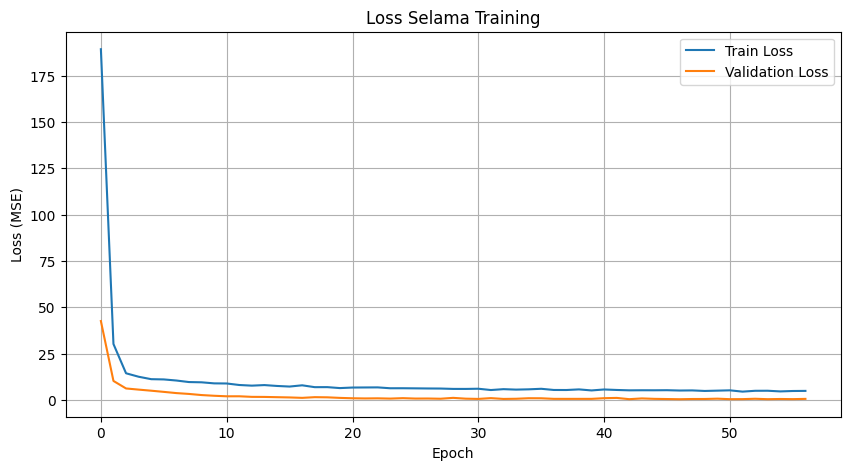

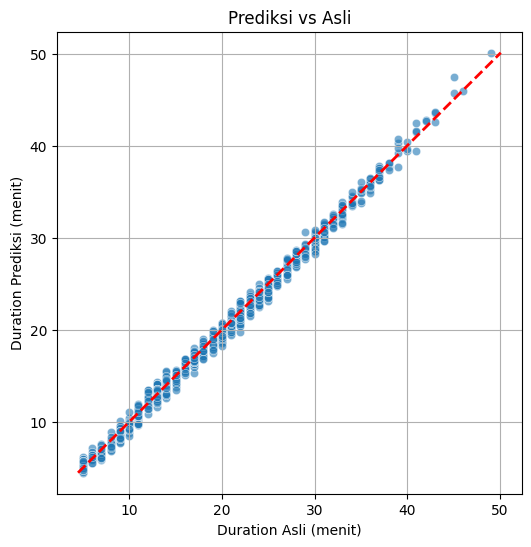

In [38]:
# Plot loss selama training
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid()
plt.show()


# Plot hasil prediksi vs data asli
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6) # flatten y_pred
plt.xlabel("Duration Asli (menit)")
plt.ylabel("Duration Prediksi (menit)")
plt.title("Prediksi vs Asli")
# Tambahkan garis y=x ideal
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.grid(True)
plt.show()

In [40]:
# Generate requirements.txt
!pip freeze > requirements.txt

from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 # Kesimpulan dan Langkah Selanjutnya

### Model Neural Network telah dilatih untuk memprediksi durasi penanganan oleh provider. Model dan artefak pendukung (scaler params, feature names) sudah disimpan dan dikonversi ke format TF.js, siap untuk di-deploy ke lingkungan lain seperti aplikasi web atau backend API.

# Model Anda saat ini dilatih untuk memprediksi berapa lama provider akan menangani pasien setelah mereka mulai ditangani.